In [ ]:
%pip install scikit-learn

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
x,y = load_diabetes(return_X_y = True)
x,y

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

# **K Nearest Neighbor**

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
mod = KNeighborsRegressor()

In [ ]:
mod.fit(x,y)

KNeighborsRegressor()

In [ ]:
mod.predict(x)

array([181.4,  80.8, 150.8, 203.4, 119.4, 108. ,  83.6, 120.6, 127.8,
       187.8, 121.4, 129.6,  98.8, 166.8, 106.6, 144. , 174.4, 177.8,
       132.8, 142. ,  80. ,  73.4, 113.4, 273.8, 151.4, 126.4, 132. ,
       137.8, 107.2, 192.2, 154.6,  65. , 287.8,  78.6,  78.6, 109.6,
       175.2, 172.6, 235. ,  76.4, 158.6, 113.4,  97.6,  74. , 257. ,
        92.8, 163. , 150.2, 110.8, 145.4, 121.2, 152.4, 130.6,  94. ,
       157.2,  88.8, 137.2, 101. , 132.2, 156.6, 115. , 124. ,  65.8,
       132.4, 128.4, 154.4, 119.6,  88.8,  96.2, 136.6,  81.6, 234.6,
       174.4, 109.8, 133.2,  72. , 171.8, 106.6, 179.4, 121.6, 134.4,
       107.8,  69.2, 141.2,  80. , 108.6,  92.8, 124.6,  68.6, 110.6,
        95. , 136.4, 153.4,  82.8,  83.8, 126.8, 170.6, 165.8,  88.6,
       126.2, 158.8,  86.2, 151.8, 155.4, 139.4,  87. , 115. , 143.2,
       181. , 183. ,  71.2,  99.4, 134.8, 202. , 277.4, 165.4, 255.4,
       207. , 126.6, 132.2, 130. , 202. , 232.4, 158.2, 136.4, 166.4,
       111.6,  92.8,

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
mod = LinearRegression()

In [ ]:
mod.fit(x,y)

LinearRegression()

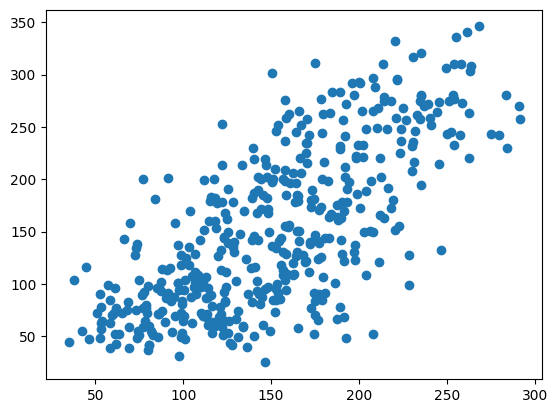

In [ ]:
import matplotlib.pyplot as plt
pred = mod.predict(x)
plt.scatter(pred, y)
plt.show()

# **Pipeline dan Preprocessing**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline #untuk menyambungkan preprocessing satu dengan lainnya

In [ ]:
mod = KNeighborsRegressor().fit(x,y)

In [ ]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    #Pass the object not class, jadi harus pake kurung ( )
    #Ini adalah list beberapa tuple, membutuhkan nama dan step
    ("model", KNeighborsRegressor(n_neighbors = 1))
    #Kasih modelnya
])

In [ ]:
pipe.fit(x,y)
#Seluruh pipe akan train dan fit dengan sendiri
predicts = pipe.predict(x)
#Buat prediksi

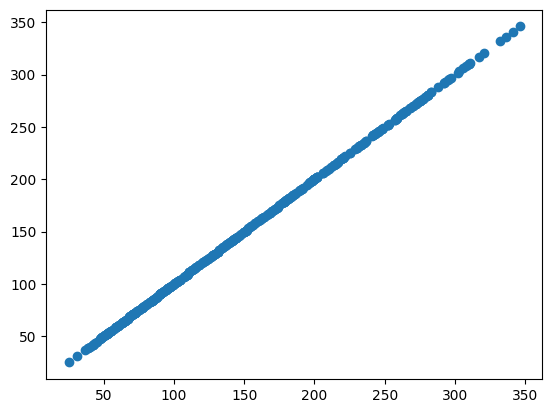

In [ ]:
plt.scatter(predicts,y)
plt.show()

# **GridSearch**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

Kode dibawah ini bisa jadi referensi saat menggunakan scikit

In [ ]:
pipe2 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors = 3))
])

pipe2.get_params()
#setting yang bisa diatur pada param_grid di GridSearch

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=3))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=3),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 3,
 'model__p': 2,
 'model__weights': 'uniform'}

In [ ]:
model = GridSearchCV(estimator = pipe, #estimator adalah sesuatu yang punya .fit() dan .predict() contohnya pipe
             param_grid = {'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}, #parameter grid adalah representasi setting untuk pipeline, disini ngecek angka 1-10 untuk n_neighbors
             cv = 3) #cross validation

In [ ]:
#setelah model jadi, panggil dengan model.fit
model.fit(x,y)
model.cv_results_

{'mean_fit_time': array([0.00349553, 0.00276868, 0.00248265, 0.00262237, 0.00229446,
        0.00274396, 0.00214036, 0.00212447, 0.00222993, 0.00221443]),
 'std_fit_time': array([1.16980068e-03, 3.64629466e-04, 4.57216970e-05, 2.70516812e-04,
        5.63668226e-05, 2.43616426e-04, 3.61754312e-06, 1.69945608e-05,
        5.55919328e-05, 5.26683856e-06]),
 'mean_score_time': array([0.00589474, 0.00428891, 0.00329487, 0.00361872, 0.00332578,
        0.00363525, 0.00324019, 0.00321325, 0.00329661, 0.00337879]),
 'std_score_time': array([2.30421676e-03, 8.35769111e-04, 8.40867173e-05, 1.05530500e-03,
        9.98197467e-05, 3.17635194e-04, 1.16920324e-04, 3.61476604e-05,
        3.74506945e-05, 3.53274517e-06]),
 'param_model__n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'model__n_neighbors': 1},


In [ ]:
import pandas as pd
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003496,0.001170,0.005895,0.002304,1,{'model__n_neighbors': 1},0.105976,0.124092,-0.158523,0.023849,0.129168,10
1,0.002769,0.000365,0.004289,0.000836,2,{'model__n_neighbors': 2},0.268889,0.339379,0.264563,0.290944,0.034295,9
2,0.002483,0.000046,0.003295,0.000084,3,{'model__n_neighbors': 3},0.333057,0.382744,0.356899,0.357567,0.020290,8
3,0.002622,0.000271,0.003619,0.001055,4,{'model__n_neighbors': 4},0.342407,0.404701,0.409910,0.385673,0.030668,6
4,0.002294,0.000056,0.003326,0.000100,5,{'model__n_neighbors': 5},0.358865,0.377198,0.412549,0.382871,0.022280,7
5,0.002744,0.000244,0.003635,0.000318,6,{'model__n_neighbors': 6},0.372665,0.389923,0.436389,0.399659,0.026911,5
6,0.002140,0.000004,0.003240,0.000117,7,{'model__n_neighbors': 7},0.412584,0.393681,0.446147,0.417471,0.021696,4
7,0.002124,0.000017,0.003213,0.000036,8,{'model__n_neighbors': 8},0.414478,0.409779,0.485850,0.436702,0.034806,3
8,0.002230,0.000056,0.003297,0.000037,9,{'model__n_neighbors': 9},0.414191,0.412035,0.528462,0.451563,0.054383,2
9,0.002214,0.000005,0.003379,0.000004,10,{'model__n_neighbors': 10},0.408989,0.405303,0.544371,0.452888,0.064706,1
